In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import csv
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split


import random 
import math 

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#Read the data 
data= pd.read_csv("/Users/aminameghezzi/Downloads/dataset12.csv", sep=',')
data

,Unnamed: 0,University,Major,Decision,GRE_SCORE,GRE Quant,GRE Verbal,work_ex,Name,GPA,Language Proficiency
0,2,50,0,1,315.0,158.0,157.0,3.0,bostonner,77.000,7.5
1,3,50,0,1,301.0,151.0,150.0,60.0,KrithikaCT,80.120,0.0
2,4,50,0,1,311.0,156.0,155.0,25.0,Giridhar312,66.954,7.0
3,5,50,0,1,312.0,156.0,156.0,24.0,Shreepriya,73.060,8.0
4,6,50,0,1,307.0,154.0,153.0,34.0,muktika,68.800,7.5
...,...,...,...,...,...,...,...,...,...,...,...
1609,445,293,1,0,284.0,140.0,144.0,NaN,Aryan,68.000,6.5
1610,446,293,1,0,293.0,152.0,141.0,NaN,Shrinivass,61.700,6.0
1611,447,293,1,0,306.0,157.0,149.0,NaN,Suhaib Siraj,63.170,7.5
1612,448,293,1,0,296.0,147.0,149.0,NaN,Mohan,65.000,6.5


In [3]:
data.drop(columns=['Unnamed: 0','Name'], inplace=True)
data

,University,Major,Decision,GRE_SCORE,GRE Quant,GRE Verbal,work_ex,GPA,Language Proficiency
0,50,0,1,315.0,158.0,157.0,3.0,77.000,7.5
1,50,0,1,301.0,151.0,150.0,60.0,80.120,0.0
2,50,0,1,311.0,156.0,155.0,25.0,66.954,7.0
3,50,0,1,312.0,156.0,156.0,24.0,73.060,8.0
4,50,0,1,307.0,154.0,153.0,34.0,68.800,7.5
...,...,...,...,...,...,...,...,...,...
1609,293,1,0,284.0,140.0,144.0,NaN,68.000,6.5
1610,293,1,0,293.0,152.0,141.0,NaN,61.700,6.0
1611,293,1,0,306.0,157.0,149.0,NaN,63.170,7.5
1612,293,1,0,296.0,147.0,149.0,NaN,65.000,6.5


In [4]:
#drop the nan values 
data.dropna(inplace = True)
#check if we have nan values 
data.isnull().any().any()

False

In [5]:
data

,University,Major,Decision,GRE_SCORE,GRE Quant,GRE Verbal,work_ex,GPA,Language Proficiency
0,50,0,1,315.0,158.0,157.0,3.0,77.000,7.5
1,50,0,1,301.0,151.0,150.0,60.0,80.120,0.0
2,50,0,1,311.0,156.0,155.0,25.0,66.954,7.0
3,50,0,1,312.0,156.0,156.0,24.0,73.060,8.0
4,50,0,1,307.0,154.0,153.0,34.0,68.800,7.5
...,...,...,...,...,...,...,...,...,...
1598,46,1,0,328.0,165.0,163.0,5.0,85.000,8.5
1599,46,0,0,309.0,167.0,142.0,0.0,66.173,6.5
1601,111,1,0,295.0,155.0,140.0,0.0,68.000,6.5
1608,293,1,0,280.0,150.0,130.0,1.0,75.000,5.5


In [6]:
#split the dataset into training ans testing sets
def  splitdataset(data):
    
    targets = data["Decision"].values
    features= data.drop(["Decision"],axis=1)

    features_train, features_test,target_train, target_test= train_test_split(features ,targets, test_size = 0.3, random_state = 100)
    return features,targets ,features_train, features_test,target_train, target_test

In [7]:
#function to tarin the dataset using naive bayse approch 
def NBClassifier(features_train,target_train):
    model= GaussianNB()
    model.fit(features_train,target_train)
    
    return model


   

In [8]:
#function to make predection 
def prediction(X_test, model): 
  

    predicted=model.predict(X_test)
    print("Predicted values:") 
    for item in zip(target_test,predicted):
        print('actual was ', item[0], 'predection was',item[1])
    return predicted 

In [9]:
#calculating the Presion, Recall and Accuracy

features,targets ,features_train, features_test,target_train, target_test= splitdataset(data) 
model = NBClassifier(features_train,target_train) 
predicted=prediction(features_test, model)




Predicted values:
actual was  1 predection was 1
actual was  0 predection was 0
actual was  0 predection was 0
actual was  1 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  1 predection was 0
actual was  1 predection was 0
actual was  1 predection was 0
actual was  0 predection was 0
actual was  1 predection was 1
actual was  0 predection was 0
actual was  1 predection was 0
actual was  1 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  1 predection was 0
actual was  1 predection was 0
actual was  1 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  1 predection was 0
actual was  1 predection was 0
actual was  0 predection was 0
actual was  1 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  0 predection was 0
actual was  0 predect

In [10]:
print(metrics.classification_report(target_test, predicted))
print(metrics.confusion_matrix(target_test, predicted))

print ("Accuracy : ", accuracy_score(target_test, predicted)*100) 


              precision    recall  f1-score   support

           0       0.51      0.97      0.67       211
           1       0.79      0.12      0.20       224

    accuracy                           0.53       435
   macro avg       0.65      0.54      0.43       435
weighted avg       0.65      0.53      0.43       435

[[204   7]
 [198  26]]
Accuracy :  52.87356321839081


[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy :  52.87356321839081


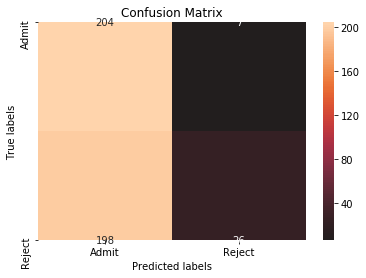

In [46]:
#ploting the confusion matrics 
conf_matrix= plt.subplot()
labels=[0, 1]
cm = metrics.confusion_matrix(target_test, predicted)
print(predicted)

columns=['Admit', 'Reject']
index=['Admit', 'Reject']
cm_df = pd.DataFrame(cm,columns,index)
sns.heatmap(cm_df, annot=True,ax=conf_matrix, fmt='g', center=True); #annot=True to annotate cells
conf_matrix.set_xlabel('Predicted labels');conf_matrix.set_ylabel('True labels'); 
conf_matrix.set_title('Confusion Matrix'); 
conf_matrix.xaxis.set_ticklabels(['Admit', 'Reject']); conf_matrix.yaxis.set_ticklabels(['Admit', 'Reject']);


#print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(target_test, predicted)*100)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.683


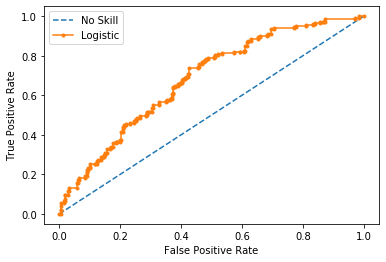

In [11]:
# roc curve and auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(target_test))]
# fit a model
#model = LogisticRegression(solver='lbfgs')
#model.fit(trainX, trainy)
model= NBClassifier(features_train,target_train) 

#lr_probs = model.predict_proba(testX)
lr_probs=model.predict_proba(features_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(target_test, ns_probs)
lr_auc = roc_auc_score(target_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(target_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(target_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.202 auc=0.664


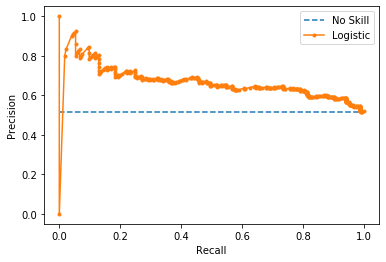

In [12]:

# precision-recall curve and f1

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

model= NBClassifier(features_train,target_train) 
# predict probabilities
lr_probs = model.predict_proba(features_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(features_test)
lr_precision, lr_recall, _ = precision_recall_curve(target_test, lr_probs)
lr_f1, lr_auc = f1_score(target_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(target_test[target_test==1]) / len(target_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [13]:
#spliting the dataset to prepare it KNN classifier 
x,y,x_train, x_test, y_train, y_test = splitdataset(data)

In [14]:
#scale the features so that all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [15]:
y_train_label = [1 if each > 0.8 else 0 for each in y_train]
y_test_label  = [1 if each > 0.8 else 0 for each in y_test]

In [27]:
math.sqrt(len(y_test_label))

20.85665361461421

In [16]:
#trainning and predecting using K_Nearest NeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'euclidean')
print(knnc.fit(x_train, y_train_label))
y_pred_knn = knnc.predict(x_test)
y_pred_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,

In [47]:
print(y_pred_knn)

[1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0
 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0]


In [17]:
#Evaluate the classifier
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[127  84]
 [ 76 148]]
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       211
           1       0.64      0.66      0.65       224

    accuracy                           0.63       435
   macro avg       0.63      0.63      0.63       435
weighted avg       0.63      0.63      0.63       435



In [18]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score,recall_score
print("Accuracy Score = ",accuracy_score(y_test_label, y_pred_knn))
print("precision_score: ", precision_score(y_test_label,knnc.predict(x_test)))
print("recall_score: ", recall_score(y_test_label,knnc.predict(x_test)))
print("f1_score: ",f1_score(y_test_label,knnc.predict(x_test)))


Accuracy Score =  0.632183908045977
precision_score:  0.6379310344827587
recall_score:  0.6607142857142857
f1_score:  0.6491228070175439


[1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0]
Accuracy :  60.91954022988506


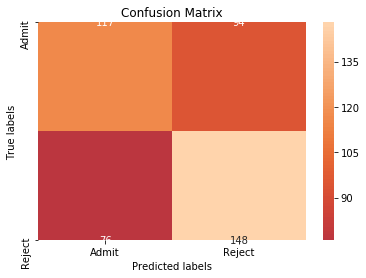

In [35]:
#plot the confusion matrix 
conf_matrix= plt.subplot()
labels=[0, 1]
cm = confusion_matrix(y_test, y_pred_knn)
print(y_test)

columns=['Admit', 'Reject']
index=['Admit', 'Reject']
cm_df = pd.DataFrame(cm,columns,index)
sns.heatmap(cm_df, annot=True,ax=conf_matrix, fmt='g', center=True); #annot=True to annotate cells
conf_matrix.set_xlabel('Predicted labels');conf_matrix.set_ylabel('True labels'); 
conf_matrix.set_title('Confusion Matrix'); 
conf_matrix.xaxis.set_ticklabels(['Admit', 'Reject']); conf_matrix.yaxis.set_ticklabels(['Admit', 'Reject']);


#print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred_knn)*100)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.683


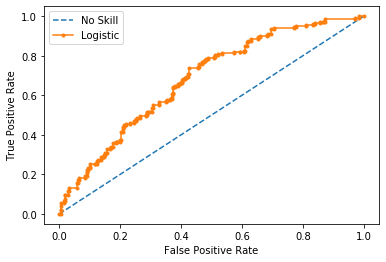

In [19]:
# roc curve and auc


#lr_probs = model.predict_proba(testX)
lr_probs=model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
#the accuracy fromDecisionTreeClassifier 
DecisionTreeClassifierAccuracy=0.63678160919540225


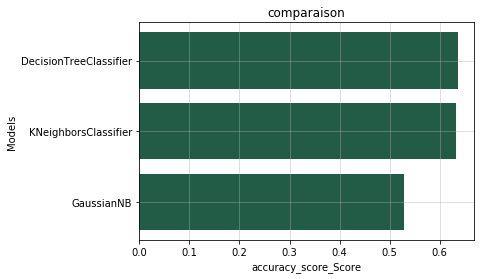

In [21]:
#Comaparaison between the three classifier 
x = ["GaussianNB","KNeighborsClassifier","DecisionTreeClassifier"]
y = np.array([accuracy_score(target_test, predicted),accuracy_score(y_test, y_pred_knn),DecisionTreeClassifierAccuracy])
plt.barh(x,y, color='#225b46')
plt.xlabel("accuracy_score_Score")
plt.ylabel("Models")
plt.title("comparaison")
plt.grid(alpha=0.5)
plt.show()